###  📊 IST652 Final Project: Analysis of Income,  Inflation, Expenditure, and Crime Across U.S. States
## Group 1 - Spring 2025
Shivani Pandeti

Jill Karia

Reeya Tapan Patra

## Imported libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import requests

## Data loading

In [2]:
# Load the Personal Income dataset (skip metadata rows)
income_df = pd.read_csv("/content/SAINC1__ALL_AREAS_1929_2024.csv")
inflation_df = pd.read_csv('/content/SASUMMARY__ALL_AREAS_1998_2024.csv')

In [3]:
import requests
import pandas as pd
from time import sleep

# API Key
API_KEY = "iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv"

# Valid states and their abbreviations
state_map = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming',
    'DC': 'District of Columbia'
}

# Parameters
offense = "V"
from_date = "01-2012"
to_date = "12-2022"

# Store all states' data
all_crime_data = []

for abbr, full_name in state_map.items():
    print(f"Fetching {offense} crime data for {abbr} ({full_name})...")

    url = f"https://api.usa.gov/crime/fbi/cde/summarized/state/{abbr}/{offense}?from={from_date}&to={to_date}&API_KEY={API_KEY}"
    response = requests.get(url)

    if response.status_code == 200:
        try:
            rates_dict = response.json()['offenses']['rates'].get(full_name, {})
            temp_df = pd.DataFrame([
                {'State': abbr, 'Month': k, 'Crime_Rate': v}
                for k, v in rates_dict.items()
            ])
            if not temp_df.empty:
                temp_df['Month'] = pd.to_datetime(temp_df['Month'], format="%m-%Y")
                temp_df['Year'] = temp_df['Month'].dt.year
                annual_df = temp_df.groupby(['State', 'Year'])['Crime_Rate'].mean().reset_index()
                all_crime_data.append(annual_df)
        except Exception as e:
            print(f"Failed to parse data for {abbr}: {e}")
    else:
        print(f"Error for {abbr}: {response.status_code}")

    sleep(0.2)  # Be polite to the API

# Combine all
violent_crime_df = pd.concat(all_crime_data, ignore_index=True)
print(violent_crime_df.head())

Fetching V crime data for AL (Alabama)...
Fetching V crime data for AK (Alaska)...
Fetching V crime data for AZ (Arizona)...
Fetching V crime data for AR (Arkansas)...
Fetching V crime data for CA (California)...
Fetching V crime data for CO (Colorado)...
Fetching V crime data for CT (Connecticut)...
Fetching V crime data for DE (Delaware)...
Fetching V crime data for FL (Florida)...
Fetching V crime data for GA (Georgia)...
Fetching V crime data for HI (Hawaii)...
Fetching V crime data for ID (Idaho)...
Fetching V crime data for IL (Illinois)...
Fetching V crime data for IN (Indiana)...
Fetching V crime data for IA (Iowa)...
Fetching V crime data for KS (Kansas)...
Fetching V crime data for KY (Kentucky)...
Fetching V crime data for LA (Louisiana)...
Fetching V crime data for ME (Maine)...
Fetching V crime data for MD (Maryland)...
Fetching V crime data for MA (Massachusetts)...
Fetching V crime data for MI (Michigan)...
Fetching V crime data for MN (Minnesota)...
Fetching V crime dat

In [4]:
import requests
import pandas as pd
from time import sleep

API_KEY = "iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv"

state_map = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming',
    'DC': 'District of Columbia'
}

# Parameters
offense = "P"  # Property crime
from_date = "01-2012"
to_date = "12-2022"

all_property_data = []

for abbr, full_name in state_map.items():
    print(f"Fetching property crime data for {abbr} ({full_name})...")

    url = f"https://api.usa.gov/crime/fbi/cde/summarized/state/{abbr}/{offense}?from={from_date}&to={to_date}&API_KEY={API_KEY}"
    response = requests.get(url)

    if response.status_code == 200:
        try:
            rates_dict = response.json()['offenses']['rates'].get(full_name, {})
            temp_df = pd.DataFrame([
                {'State': abbr, 'Month': k, 'Crime_Rate': v}
                for k, v in rates_dict.items()
            ])
            if not temp_df.empty:
                temp_df['Month'] = pd.to_datetime(temp_df['Month'], format="%m-%Y")
                temp_df['Year'] = temp_df['Month'].dt.year
                annual_df = temp_df.groupby(['State', 'Year'])['Crime_Rate'].mean().reset_index()
                all_property_data.append(annual_df)
        except Exception as e:
            print(f"Failed to parse data for {abbr}: {e}")
    else:
        print(f"Error for {abbr}: {response.status_code}")

    sleep(0.2)  # Throttle to be safe

# Combine all
property_crime_df = pd.concat(all_property_data, ignore_index=True)
property_crime_df.rename(columns={"Crime_Rate": "Property_Crime_Rate"}, inplace=True)

# Preview
print(property_crime_df.head())

Fetching property crime data for AL (Alabama)...
Fetching property crime data for AK (Alaska)...
Fetching property crime data for AZ (Arizona)...
Fetching property crime data for AR (Arkansas)...
Fetching property crime data for CA (California)...
Fetching property crime data for CO (Colorado)...
Fetching property crime data for CT (Connecticut)...
Fetching property crime data for DE (Delaware)...
Fetching property crime data for FL (Florida)...
Fetching property crime data for GA (Georgia)...
Fetching property crime data for HI (Hawaii)...
Fetching property crime data for ID (Idaho)...
Fetching property crime data for IL (Illinois)...
Fetching property crime data for IN (Indiana)...
Fetching property crime data for IA (Iowa)...
Fetching property crime data for KS (Kansas)...
Fetching property crime data for KY (Kentucky)...
Fetching property crime data for LA (Louisiana)...
Fetching property crime data for ME (Maine)...
Fetching property crime data for MD (Maryland)...
Fetching proper

## Data Merging, Cleaning and Manipulation

In [5]:
income_df.head()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1929,1930,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,"""00000""",United States,,SAINC1,1.0,...,Personal income (millions of dollars),Millions of dollars,85151.0,76394.0,...,15467113.0,15884741.0,16658962.0,17514402.0,18349584.0,19600945.0,21403979.0,22077232.0,23380269.0,24632679.6
1,"""00000""",United States,,SAINC1,2.0,...,Population (persons) 1/,Number of persons,121769000,123075000,...,321815121.0,324353340.0,326608609.0,328529577.0,330226227.0,331577720.0,332099760.0,334017321.0,336806231.0,340110988.0
2,"""00000""",United States,,SAINC1,3.0,...,Per capita personal income (dollars) 2/,Dollars,699,621,...,48062.0,48974.0,51006.0,53311.0,55567.0,59114.0,64450.0,66096.0,69418.0,72425.0
3,"""01000""",Alabama,5,SAINC1,1.0,...,Personal income (millions of dollars),Millions of dollars,843.2,697.5,...,187474.7,190871.8,197963.8,205674.2,215151.8,230732.2,254960.4,262235.6,276925.6,292359.5
4,"""01000""",Alabama,5,SAINC1,2.0,...,Population (persons) 1/,Number of persons,2644000,2647000,...,4909177.0,4931579.0,4953096.0,4977088.0,5003778.0,5033094.0,5049196.0,5076181.0,5117673.0,5157699.0


In [6]:
# Step: Filter only rows where LineCode (5th column) == 3.0
income_pc = income_df[income_df.iloc[:, 4] == 3.0].copy()

In [7]:
year_cols = [str(year) for year in range(2012, 2023)]
income_selected = income_pc[["GeoName"] + year_cols].copy()

# Preview
income_selected.head()

,GeoName,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,United States,44238.0,44402.0,46289.0,48062.0,48974.0,51006.0,53311.0,55567.0,59114.0,64450.0,66096.0
5,Alabama,35559.0,35706.0,36722.0,38189.0,38704.0,39968.0,41324.0,42998.0,45843.0,50495.0,51660.0
8,Alaska *,53340.0,52252.0,55098.0,56714.0,55536.0,56500.0,58997.0,60504.0,61853.0,65608.0,68905.0
11,Arizona,36364.0,36918.0,38268.0,39888.0,41173.0,43255.0,45297.0,47718.0,52038.0,56963.0,58873.0
14,Arkansas,36289.0,36286.0,38220.0,39267.0,40181.0,41403.0,43031.0,43737.0,47100.0,52872.0,55299.0


In [8]:
# Remove the United States row
income_selected = income_selected[income_selected["GeoName"] != "United States"].copy()

In [9]:
# Clean state names by removing '*' and extra whitespace
income_selected["GeoName"] = income_selected["GeoName"].str.replace("*", "", regex=False).str.strip()

# Confirm cleaning worked
income_selected["GeoName"].unique()[:10]

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida'], dtype=object)

In [10]:
# Pivot: years as rows, states as columns
income_pivot = income_selected.set_index("GeoName").T

# Reset index to get 'Year' as a column
income_pivot.index.name = "Year"
income_pivot = income_pivot.reset_index()

# Convert Year column to int
income_pivot["Year"] = income_pivot["Year"].astype(int)

# Preview final structure
income_pivot.head()

GeoName,Year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Wisconsin,Wyoming,New England,Mideast,Great Lakes,Plains,Southeast,Southwest,Rocky Mountain,Far West
0,2012,35559.0,53340.0,36364.0,36289.0,47793.0,45495.0,63556.0,43771.0,67522.0,...,42639.0,53597.0,54788.0,51099.0,41713.0,44289.0,39458.0,41961.0,41400.0,46617.0
1,2013,35706.0,52252.0,36918.0,36286.0,48074.0,47088.0,62000.0,43943.0,67081.0,...,42685.0,52835.0,54319.0,51224.0,42149.0,44420.0,39255.0,42550.0,42336.0,46860.0
2,2014,36722.0,55098.0,38268.0,38220.0,50617.0,50251.0,64484.0,45359.0,70527.0,...,44156.0,56251.0,56278.0,52876.0,43709.0,45907.0,40966.0,44716.0,44708.0,49357.0
3,2015,38189.0,56714.0,39888.0,39267.0,53816.0,51401.0,66222.0,47238.0,74784.0,...,45928.0,56120.0,58786.0,54912.0,45553.0,47117.0,42623.0,44903.0,46169.0,52276.0
4,2016,38704.0,55536.0,41173.0,40181.0,55862.0,51312.0,67551.0,48186.0,77500.0,...,46595.0,53419.0,60318.0,56469.0,46376.0,47515.0,43441.0,44333.0,46476.0,54117.0


In [11]:
# List of 50 states + DC
valid_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
    'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
    'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
    'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
    'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
    'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota',
    'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
    'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
    'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
]

# Filter to keep only Year + valid states
filtered_income = income_pivot[["Year"] + valid_states].copy()

# Preview
filtered_income.head()

GeoName,Year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2012,35559.0,53340.0,36364.0,36289.0,47793.0,45495.0,63556.0,43771.0,67522.0,...,44996.0,39079.0,43869.0,35622.0,44858.0,49049.0,47053.0,35233.0,42639.0,53597.0
1,2013,35706.0,52252.0,36918.0,36286.0,48074.0,47088.0,62000.0,43943.0,67081.0,...,44988.0,39099.0,44403.0,36102.0,45296.0,48195.0,47448.0,35093.0,42685.0,52835.0
2,2014,36722.0,55098.0,38268.0,38220.0,50617.0,50251.0,64484.0,45359.0,70527.0,...,46732.0,40225.0,46747.0,37621.0,46894.0,49760.0,50259.0,36243.0,44156.0,56251.0
3,2015,38189.0,56714.0,39888.0,39267.0,53816.0,51401.0,66222.0,47238.0,74784.0,...,48308.0,41937.0,46767.0,39881.0,48117.0,51617.0,52408.0,37068.0,45928.0,56120.0
4,2016,38704.0,55536.0,41173.0,40181.0,55862.0,51312.0,67551.0,48186.0,77500.0,...,48284.0,42938.0,45868.0,41295.0,48827.0,52656.0,54296.0,37075.0,46595.0,53419.0


In [12]:
# Drop 'GeoName' if present
filtered_income = filtered_income.drop(columns=["GeoName"], errors="ignore")

# Preview
filtered_income.head()

GeoName,Year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2012,35559.0,53340.0,36364.0,36289.0,47793.0,45495.0,63556.0,43771.0,67522.0,...,44996.0,39079.0,43869.0,35622.0,44858.0,49049.0,47053.0,35233.0,42639.0,53597.0
1,2013,35706.0,52252.0,36918.0,36286.0,48074.0,47088.0,62000.0,43943.0,67081.0,...,44988.0,39099.0,44403.0,36102.0,45296.0,48195.0,47448.0,35093.0,42685.0,52835.0
2,2014,36722.0,55098.0,38268.0,38220.0,50617.0,50251.0,64484.0,45359.0,70527.0,...,46732.0,40225.0,46747.0,37621.0,46894.0,49760.0,50259.0,36243.0,44156.0,56251.0
3,2015,38189.0,56714.0,39888.0,39267.0,53816.0,51401.0,66222.0,47238.0,74784.0,...,48308.0,41937.0,46767.0,39881.0,48117.0,51617.0,52408.0,37068.0,45928.0,56120.0
4,2016,38704.0,55536.0,41173.0,40181.0,55862.0,51312.0,67551.0,48186.0,77500.0,...,48284.0,42938.0,45868.0,41295.0,48827.0,52656.0,54296.0,37075.0,46595.0,53419.0


In [13]:
# Reshape into long format: Year | State | Per_Capita_Income
income_long = income_selected.melt(id_vars="GeoName",
                                   var_name="Year",
                                   value_name="Per_Capita_Income")

# Clean up types
income_long["Year"] = income_long["Year"].astype(int)
income_long["GeoName"] = income_long["GeoName"].str.strip()

# Rename for clarity
income_long = income_long.rename(columns={"GeoName": "State"})

# Preview
income_long.head()


,State,Year,Per_Capita_Income
0,Alabama,2012,35559.0
1,Alaska,2012,53340.0
2,Arizona,2012,36364.0
3,Arkansas,2012,36289.0
4,California,2012,47793.0


In [14]:
income_long.shape

(649, 3)

In [15]:
# Unique state names and count
income_long["State"].value_counts()


,count
State,
Alabama,11
Alaska,11
Arizona,11
Arkansas,11
California,11
Colorado,11
Connecticut,11
Delaware,11
District of Columbia,11


In [16]:
# Define valid states (50 + DC)
valid_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
    'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
    'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
    'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
    'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
    'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota',
    'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
    'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
    'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
]

# Filter only those rows
income_long = income_long[income_long["State"].isin(valid_states)].copy()

# Final shape check
print(income_long.shape)


(561, 3)


In [17]:
income_long

,State,Year,Per_Capita_Income
0,Alabama,2012,35559.0
1,Alaska,2012,53340.0
2,Arizona,2012,36364.0
3,Arkansas,2012,36289.0
4,California,2012,47793.0
...,...,...,...
636,Virginia,2022,69673.0
637,Washington,2022,75580.0
638,West Virginia,2022,50131.0
639,Wisconsin,2022,61851.0


In [18]:
# Load the expenditure file, skipping the first metadata row
expenditure_df = pd.read_csv("/content/SAPCE1__ALL_AREAS_1997_2023.csv")

# Show the first few rows
expenditure_df.head()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,"""00000""",United States,,SAPCE1,1.0,...,Personal consumption expenditures,Millions of current dollars,5536790.1,5877248.2,...,11874450.4,12297437.8,12726848.8,13290625.5,13934441.7,14437543.0,14225657.2,16113945.5,17690840.5,18822768.8
1,"""00000""",United States,,SAPCE1,2.0,...,Goods,Millions of current dollars,2006505.5,2108439.4,...,3886577.1,3955129.8,4033036.2,4212214.2,4414207.9,4532816.6,4706701.5,5500372.4,5939080.2,6123912.4
2,"""00000""",United States,,SAPCE1,3.0,...,Durable goods,Millions of current dollars,715529.6,779293.4,...,1247260.2,1315793.6,1356495.3,1415910.6,1488830.8,1523643.6,1616929.1,1990266.5,2078035.3,2142619.4
3,"""00000""",United States,,SAPCE1,4.0,...,Motor vehicles and parts,Millions of current dollars,293082.5,320204.7,...,451591.4,490732.9,504623.8,529413.3,549997.9,544954.8,546708.9,697331.9,726372.7,749975.3
4,"""00000""",United States,,SAPCE1,5.0,...,Furnishings and durable household equipment,Millions of current dollars,160490.2,173579.1,...,275462.5,292690.6,306047.0,319184.6,335952.9,346713.7,379316.2,450814.0,475501.5,480395.8


In [19]:
# Filter for total personal consumption expenditure (LineCode 1.0)
total_pce = expenditure_df[expenditure_df["LineCode"] == 1.0].copy()
# Show a few rows
total_pce.head()


,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,"""00000""",United States,,SAPCE1,1.0,...,Personal consumption expenditures,Millions of current dollars,5536790.1,5877248.2,...,11874450.4,12297437.8,12726848.8,13290625.5,13934441.7,14437543.0,14225657.2,16113945.5,17690840.5,18822768.8
24,"""01000""",Alabama,5,SAPCE1,1.0,...,Personal consumption expenditures,Millions of current dollars,76915.6,80320.5,...,148385.6,152790.5,157806.1,163523.4,169460.2,177059.6,175833.9,198895.8,215682.5,227475.0
48,"""02000""",Alaska,8,SAPCE1,1.0,...,Personal consumption expenditures,Millions of current dollars,14229.0,14946.5,...,32641.4,33274.4,33976.4,34926.8,36077.1,36873.0,35064.0,39778.9,43438.8,46131.3
72,"""04000""",Arizona,6,SAPCE1,1.0,...,Personal consumption expenditures,Millions of current dollars,96461.8,103774.8,...,226151.5,234755.7,243679.6,259029.1,273816.1,286698.1,291939.3,335779.0,373625.2,400704.5
96,"""05000""",Arkansas,5,SAPCE1,1.0,...,Personal consumption expenditures,Millions of current dollars,41810.0,44283.3,...,88584.1,91366.0,94866.1,98052.5,102359.8,104412.9,105606.7,119286.2,128944.2,135760.8


In [20]:
# Step 2: Clean state names
total_pce["GeoName"] = total_pce["GeoName"].str.replace("*", "", regex=False).str.strip()
total_pce.head()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,"""00000""",United States,,SAPCE1,1.0,...,Personal consumption expenditures,Millions of current dollars,5536790.1,5877248.2,...,11874450.4,12297437.8,12726848.8,13290625.5,13934441.7,14437543.0,14225657.2,16113945.5,17690840.5,18822768.8
24,"""01000""",Alabama,5,SAPCE1,1.0,...,Personal consumption expenditures,Millions of current dollars,76915.6,80320.5,...,148385.6,152790.5,157806.1,163523.4,169460.2,177059.6,175833.9,198895.8,215682.5,227475.0
48,"""02000""",Alaska,8,SAPCE1,1.0,...,Personal consumption expenditures,Millions of current dollars,14229.0,14946.5,...,32641.4,33274.4,33976.4,34926.8,36077.1,36873.0,35064.0,39778.9,43438.8,46131.3
72,"""04000""",Arizona,6,SAPCE1,1.0,...,Personal consumption expenditures,Millions of current dollars,96461.8,103774.8,...,226151.5,234755.7,243679.6,259029.1,273816.1,286698.1,291939.3,335779.0,373625.2,400704.5
96,"""05000""",Arkansas,5,SAPCE1,1.0,...,Personal consumption expenditures,Millions of current dollars,41810.0,44283.3,...,88584.1,91366.0,94866.1,98052.5,102359.8,104412.9,105606.7,119286.2,128944.2,135760.8


In [21]:
# Step 3: Select relevant columns
year_cols = [str(year) for year in range(2012, 2023)]
expenditure_selected = total_pce[["GeoName"] + year_cols].copy()

In [22]:
expenditure_selected.head()

,GeoName,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,United States,11047363.2,11388233.3,11874450.4,12297437.8,12726848.8,13290625.5,13934441.7,14437543.0,14225657.2,16113945.5,17690840.5
24,Alabama,139950.6,143956.7,148385.6,152790.5,157806.1,163523.4,169460.2,177059.6,175833.9,198895.8,215682.5
48,Alaska,31039.1,31673.2,32641.4,33274.4,33976.4,34926.8,36077.1,36873.0,35064.0,39778.9,43438.8
72,Arizona,209936.3,216830.0,226151.5,234755.7,243679.6,259029.1,273816.1,286698.1,291939.3,335779.0,373625.2
96,Arkansas,83237.7,85154.6,88584.1,91366.0,94866.1,98052.5,102359.8,104412.9,105606.7,119286.2,128944.2


In [23]:
# Step 4: Filter only 50 states + DC
valid_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
    'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
    'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
    'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
    'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
    'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota',
    'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
    'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
    'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
]
expenditure_selected = expenditure_selected[expenditure_selected["GeoName"].isin(valid_states)]

# Step 5: Melt to long format
expenditure_long = expenditure_selected.melt(id_vars="GeoName",
                                             var_name="Year",
                                             value_name="Total_Expenditure")
expenditure_long["Year"] = expenditure_long["Year"].astype(int)
expenditure_long = expenditure_long.rename(columns={"GeoName": "State"})

# Preview result
expenditure_long.head()

,State,Year,Total_Expenditure
0,Alabama,2012,139950.6
1,Alaska,2012,31039.1
2,Arizona,2012,209936.3
3,Arkansas,2012,83237.7
4,California,2012,1409173.4


In [24]:
# Merge income and expenditure on State + Year
merged_df = pd.merge(income_long, expenditure_long, on=["State", "Year"], how="inner")

# Preview the merged data
merged_df.head()

,State,Year,Per_Capita_Income,Total_Expenditure
0,Alabama,2012,35559.0,139950.6
1,Alaska,2012,53340.0,31039.1
2,Arizona,2012,36364.0,209936.3
3,Arkansas,2012,36289.0,83237.7
4,California,2012,47793.0,1409173.4


In [25]:
# Rebuild the population_df by extracting rows where LineCode == 2.0 (Population)
population_df = income_df[income_df.iloc[:, 4] == 2.0].copy()
population_df.head()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1929,1930,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1,"""00000""",United States,,SAINC1,2.0,...,Population (persons) 1/,Number of persons,121769000,123075000,...,321815121.0,324353340.0,326608609.0,328529577.0,330226227.0,331577720.0,332099760.0,334017321.0,336806231.0,340110988.0
4,"""01000""",Alabama,5,SAINC1,2.0,...,Population (persons) 1/,Number of persons,2644000,2647000,...,4909177.0,4931579.0,4953096.0,4977088.0,5003778.0,5033094.0,5049196.0,5076181.0,5117673.0,5157699.0
7,"""02000""",Alaska *,8,SAINC1,2.0,...,Population (persons) 1/,Number of persons,(NA),(NA),...,739120.0,743397.0,741937.0,737710.0,734820.0,733017.0,734420.0,734442.0,736510.0,740133.0
10,"""04000""",Arizona,6,SAINC1,2.0,...,Population (persons) 1/,Number of persons,430000,434000,...,6705607.0,6793278.0,6872380.0,6964300.0,7067695.0,7187135.0,7274078.0,7377566.0,7473027.0,7582384.0
13,"""05000""",Arkansas,5,SAINC1,2.0,...,Population (persons) 1/,Number of persons,1852000,1859000,...,2970210.0,2980475.0,2990702.0,2997195.0,3004206.0,3014546.0,3026870.0,3047704.0,3069463.0,3088354.0


In [26]:
# Recreate the GeoName column and clean it
population_df["GeoName"] = income_df.iloc[:, 1].str.replace("*", "", regex=False).str.strip()

# Step 3: Select relevant columns
year_cols = [str(year) for year in range(2012, 2023)]
population_df = population_df[["GeoName"] + year_cols].copy()
population_df.head()

,GeoName,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,United States,314339099.0,316726282.0,319257560.0,321815121.0,324353340.0,326608609.0,328529577.0,330226227.0,331577720.0,332099760.0,334017321.0
4,Alabama,4839947.0,4865253.0,4887757.0,4909177.0,4931579.0,4953096.0,4977088.0,5003778.0,5033094.0,5049196.0,5076181.0
7,Alaska,731106.0,738054.0,737634.0,739120.0,743397.0,741937.0,737710.0,734820.0,733017.0,734420.0,734442.0
10,Arizona,6501800.0,6555926.0,6629890.0,6705607.0,6793278.0,6872380.0,6964300.0,7067695.0,7187135.0,7274078.0,7377566.0
13,Arkansas,2948793.0,2954563.0,2961050.0,2970210.0,2980475.0,2990702.0,2997195.0,3004206.0,3014546.0,3026870.0,3047704.0


In [27]:
population_df = population_df[population_df["GeoName"].isin(valid_states)]

# Step 5: Melt to long format
population_long = population_df.melt(id_vars="GeoName",
                                             var_name="Year",
                                             value_name="Population")
population_long["Year"] = population_long["Year"].astype(int)
population_long = population_long.rename(columns={"GeoName": "State"})

# Preview result
population_long.head()

,State,Year,Population
0,Alabama,2012,4839947.0
1,Alaska,2012,731106.0
2,Arizona,2012,6501800.0
3,Arkansas,2012,2948793.0
4,California,2012,37971412.0


In [28]:
# Step 2: Merge the result with population
merged_df = pd.merge(merged_df, population_long, on=["State", "Year"], how="inner")

# Step 3: Optional — calculate per capita expenditure for consistency
merged_df["Per_Capita_Expenditure"] = (
    (merged_df["Total_Expenditure"] * 1_000_000) / merged_df["Population"]
).round(2)

# Preview the final dataset
merged_df.head()

,State,Year,Per_Capita_Income,Total_Expenditure,Population,Per_Capita_Expenditure
0,Alabama,2012,35559.0,139950.6,4839947.0,28915.73
1,Alaska,2012,53340.0,31039.1,731106.0,42454.99
2,Arizona,2012,36364.0,209936.3,6501800.0,32288.95
3,Arkansas,2012,36289.0,83237.7,2948793.0,28227.72
4,California,2012,47793.0,1409173.4,37971412.0,37111.43


In [29]:
# Drop Total_Expenditure column
merged_df = merged_df.drop(columns=["Total_Expenditure"])

# Preview result
merged_df.head()


,State,Year,Per_Capita_Income,Population,Per_Capita_Expenditure
0,Alabama,2012,35559.0,4839947.0,28915.73
1,Alaska,2012,53340.0,731106.0,42454.99
2,Arizona,2012,36364.0,6501800.0,32288.95
3,Arkansas,2012,36289.0,2948793.0,28227.72
4,California,2012,47793.0,37971412.0,37111.43


In [30]:
# Count of years per state
year_counts = violent_crime_df.groupby("State")["Year"].nunique().reset_index()
year_counts.columns = ["State", "Years_Available"]
print(year_counts.sort_values(by="Years_Available"))


   State  Years_Available
0     AK               11
1     AL               11
2     AR               11
3     AZ               11
4     CA               11
5     CO               11
6     CT               11
7     DC               11
8     DE               11
9     FL               11
10    GA               11
11    HI               11
12    IA               11
13    ID               11
14    IL               11
15    IN               11
16    KS               11
17    KY               11
18    LA               11
19    MA               11
20    MD               11
21    ME               11
22    MI               11
23    MN               11
24    MO               11
25    MS               11
26    MT               11
27    NC               11
28    ND               11
29    NE               11
30    NH               11
31    NJ               11
32    NM               11
33    NV               11
34    NY               11
35    OH               11
36    OK               11
37    OR    

In [31]:
# Check for NaNs in Crime_Rate
missing_rates = violent_crime_df[violent_crime_df["Crime_Rate"].isna()]
print("Missing Crime Rates:\n", missing_rates)

Missing Crime Rates:
 Empty DataFrame
Columns: [State, Year, Crime_Rate]
Index: []


In [32]:
# Count how many years of data we have per state
missing_years = property_crime_df.groupby("State")["Year"].nunique().reset_index()
missing_years.columns = ["State", "Years_Available"]
print(missing_years.sort_values("Years_Available"))

   State  Years_Available
0     AK               11
1     AL               11
2     AR               11
3     AZ               11
4     CA               11
5     CO               11
6     CT               11
7     DC               11
8     DE               11
9     FL               11
10    GA               11
11    HI               11
12    IA               11
13    ID               11
14    IL               11
15    IN               11
16    KS               11
17    KY               11
18    LA               11
19    MA               11
20    MD               11
21    ME               11
22    MI               11
23    MN               11
24    MO               11
25    MS               11
26    MT               11
27    NC               11
28    ND               11
29    NE               11
30    NH               11
31    NJ               11
32    NM               11
33    NV               11
34    NY               11
35    OH               11
36    OK               11
37    OR    

In [33]:
print("Missing values in Property Crime:\n", property_crime_df.isna().sum())

Missing values in Property Crime:
 State                  0
Year                   0
Property_Crime_Rate    0
dtype: int64


In [34]:
# Reuse the same state_map
abbr_to_full = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming',
    'DC': 'District of Columbia'
}

# Add full name column for joining
property_crime_df["State_Full"] = property_crime_df["State"].map(abbr_to_full)
violent_crime_df["State_Full"] = violent_crime_df["State"].map(abbr_to_full)

In [35]:
# Merge violent and property crime on state + year
crime_df = pd.merge(
    violent_crime_df,
    property_crime_df,
    on=["State", "Year"],
    how="outer",
    suffixes=("_Violent", "_Property")
)

# Replace abbreviation with full name for clean merge
crime_df["State"] = crime_df["State"].map(abbr_to_full)
crime_df = crime_df.drop(columns=["State_Full_Violent", "State_Full_Property"], errors="ignore")


In [36]:
final_merged = pd.merge(merged_df, crime_df, on=["State", "Year"], how="left")

# Preview final result
print(final_merged.head())


        State  Year  Per_Capita_Income  Population  Per_Capita_Expenditure  \
0     Alabama  2012            35559.0   4839947.0                28915.73   
1      Alaska  2012            53340.0    731106.0                42454.99   
2     Arizona  2012            36364.0   6501800.0                32288.95   
3    Arkansas  2012            36289.0   2948793.0                28227.72   
4  California  2012            47793.0  37971412.0                37111.43   

   Crime_Rate  Property_Crime_Rate  
0  175.033333           295.384167  
1  158.288333           230.308333  
2  117.170833           263.347500  
3  177.392500           313.498333  
4   88.223333           231.517500  


In [37]:
# Summary of missing values
null_summary = final_merged.isna().sum()
print("Missing values per column:\n", null_summary)

Missing values per column:
 State                     0
Year                      0
Per_Capita_Income         0
Population                0
Per_Capita_Expenditure    0
Crime_Rate                0
Property_Crime_Rate       0
dtype: int64


In [38]:
final_merged.to_csv("income_expenditure_population_crime.csv")

In [39]:
# Step 2: Define metric line codes
linecodes = {
    4: 'GDP',
    13: 'RPPS',
    15: 'Unemployment'
}

In [40]:
# Step 3: Filter only required line codes
inflation_df = inflation_df[inflation_df['LineCode'].isin(linecodes.keys())]

In [41]:
# Step 4: Remove national aggregate row ("United States")
inflation_df = inflation_df[inflation_df['GeoName'] != 'United States']

In [42]:
# Step 5: Keep only necessary columns (GeoName, LineCode, 2012–2022)
years = [str(y) for y in range(2012, 2023)]
inflation_df = inflation_df[['GeoName', 'LineCode'] + years]

In [43]:
# Step 6: Melt to long format (convert wide year columns to rows)
inflation_df_melted = inflation_df.melt(
    id_vars=['GeoName', 'LineCode'],
    value_vars=years,
    var_name='Year',
    value_name='Value'
)

In [44]:
# Step 7: Clean numeric values (remove commas and convert to float)
inflation_df_melted['Value'] = pd.to_numeric(inflation_df_melted['Value'].astype(str).str.replace(',', ''), errors='coerce')

In [45]:
# Step 8: Map line codes to metric names
inflation_df_melted['Metric'] = inflation_df_melted['LineCode'].map(linecodes)

In [46]:
# Step 9: Pivot so each row = State-Year, and columns = GDP, RPPS, Unemployment
df_pivot = inflation_df_melted.pivot_table(
    index=['GeoName', 'Year'],
    columns='Metric',
    values='Value'
).reset_index()

In [47]:
# Step 10: Rename columns
df_pivot = df_pivot.rename(columns={'GeoName': 'State'})

In [48]:
# Step 11: Filter only states with exactly 11 years of data (2012–2022)
state_year_counts = df_pivot.groupby("State")["Year"].count().reset_index(name="Year_Count")
valid_states = state_year_counts[state_year_counts["Year_Count"] == 11]["State"]
inflation_final_df = df_pivot[df_pivot["State"].isin(valid_states)].reset_index(drop=True)

In [49]:
# Step 12: Sort and verify final row count
inflation_final_df = inflation_final_df.sort_values(by=["State", "Year"]).reset_index(drop=True)
print(f"✅ Final Row Count: {inflation_final_df.shape[0]}")  # Should print 561

✅ Final Row Count: 561


In [50]:
final_merged

,State,Year,Per_Capita_Income,Population,Per_Capita_Expenditure,Crime_Rate,Property_Crime_Rate
0,Alabama,2012,35559.0,4839947.0,28915.73,175.033333,295.384167
1,Alaska,2012,53340.0,731106.0,42454.99,158.288333,230.308333
2,Arizona,2012,36364.0,6501800.0,32288.95,117.170833,263.347500
3,Arkansas,2012,36289.0,2948793.0,28227.72,177.392500,313.498333
4,California,2012,47793.0,37971412.0,37111.43,88.223333,231.517500
...,...,...,...,...,...,...,...
556,Virginia,2022,69673.0,8683414.0,52435.00,101.370833,143.737500
557,Washington,2022,75580.0,7794123.0,57033.59,96.409167,283.852500
558,West Virginia,2022,50131.0,1774122.0,44975.20,80.313333,110.814167
559,Wisconsin,2022,61851.0,5903975.0,49816.28,70.939167,115.871667


In [51]:
inflation_final_df

Metric,State,Year,GDP,RPPS,Unemployment
0,Alabama,2012,188280.7,90.515,2503656.0
1,Alabama,2013,193981.5,90.273,2523020.0
2,Alabama,2014,197064.4,90.137,2552256.0
3,Alabama,2015,203113.3,89.706,2587641.0
4,Alabama,2016,208824.3,90.580,2619761.0
...,...,...,...,...,...
556,Wyoming,2018,39614.5,92.345,404591.0
557,Wyoming,2019,40029.5,94.120,407870.0
558,Wyoming,2020,36709.6,91.831,401353.0
559,Wyoming,2021,42319.1,91.533,419813.0


In [52]:
inflation_final_df.dtypes

,0
Metric,
State,object
Year,object
GDP,float64
RPPS,float64
Unemployment,float64


In [53]:
final_merged.dtypes

,0
State,object
Year,int64
Per_Capita_Income,float64
Population,float64
Per_Capita_Expenditure,float64
Crime_Rate,float64
Property_Crime_Rate,float64


In [54]:
inflation_final_df['Year'] = pd.to_datetime(inflation_final_df['Year'], format='%Y').dt.year

In [55]:
merged_df = pd.merge(inflation_final_df, final_merged , on=['State', 'Year'], how='left')

In [56]:
merged_df

,State,Year,GDP,RPPS,Unemployment,Per_Capita_Income,Population,Per_Capita_Expenditure,Crime_Rate,Property_Crime_Rate
0,Alabama,2012,188280.7,90.515,2503656.0,35559.0,4839947.0,28915.73,175.033333,295.384167
1,Alabama,2013,193981.5,90.273,2523020.0,35706.0,4865253.0,29588.74,193.590000,283.433333
2,Alabama,2014,197064.4,90.137,2552256.0,36722.0,4887757.0,30358.63,185.558333,266.225833
3,Alabama,2015,203113.3,89.706,2587641.0,38189.0,4909177.0,31123.44,192.901667,249.524167
4,Alabama,2016,208824.3,90.580,2619761.0,38704.0,4931579.0,31999.10,201.317500,246.285833
...,...,...,...,...,...,...,...,...,...,...
556,Wyoming,2018,39614.5,92.345,404591.0,59197.0,574783.0,42889.75,90.622500,153.850833
557,Wyoming,2019,40029.5,94.120,407870.0,61853.0,575327.0,43915.89,95.472500,137.975000
558,Wyoming,2020,36709.6,91.831,401353.0,65094.0,577681.0,44407.03,98.446667,136.294167
559,Wyoming,2021,42319.1,91.533,419813.0,70962.0,579636.0,49290.93,105.676667,132.178333


In [57]:
linecodes = {
    3: 'Durable goods',
    8 : 'Nondurable goods',
    13 : 'Services',
    22 : 'Final consumption expenditures of nonprofit institutions serving households (NPISHs)'
}

In [58]:
# Step 3: Filter only required line codes
expenditure_df = expenditure_df[expenditure_df['LineCode'].isin(linecodes.keys())]

In [59]:
# Step 4: Remove national aggregate row ("United States")
expenditure_df = expenditure_df[expenditure_df['GeoName'] != 'United States']

In [60]:
# Step 5: Keep only necessary columns (GeoName, LineCode, 2012–2022)
years = [str(y) for y in range(2012, 2023)]
expenditure_df = expenditure_df[['GeoName', 'LineCode'] + years]

In [61]:
# Step 6: Melt to long format (convert wide year columns to rows)
expenditure_df_melted = expenditure_df.melt(
    id_vars=['GeoName', 'LineCode'],
    value_vars=years,
    var_name='Year',
    value_name='Value'
)

In [62]:
# Step 7: Clean numeric values (remove commas and convert to float)
expenditure_df_melted['Value'] = pd.to_numeric(expenditure_df_melted['Value'].astype(str).str.replace(',', ''), errors='coerce')

In [63]:
# Step 8: Map line codes to metric names
expenditure_df_melted['Metric'] = expenditure_df_melted['LineCode'].map(linecodes)

In [64]:
# Step 9: Pivot so each row = State-Year, and columns = GDP, RPPS, Unemployment
expenditure_df_pivot = expenditure_df_melted.pivot_table(
    index=['GeoName', 'Year'],
    columns='Metric',
    values='Value'
).reset_index()

In [65]:
# Step 10: Rename columns
expenditure_df_pivot = expenditure_df_pivot.rename(columns={'GeoName': 'State'})

In [66]:
# Step 11: Filter only states with exactly 11 years of data (2012–2022)
state_year_counts = expenditure_df_pivot.groupby("State")["Year"].count().reset_index(name="Year_Count")
valid_states = state_year_counts[state_year_counts["Year_Count"] == 11]["State"]
expenditure_final_df = expenditure_df_pivot[expenditure_df_pivot["State"].isin(valid_states)].reset_index(drop=True)

In [67]:
# Step 12: Sort and verify final row count
expenditure_final_df = expenditure_final_df.sort_values(by=["State", "Year"]).reset_index(drop=True)
print(f"✅ Final Row Count: {expenditure_final_df.shape[0]}")  # Should print 561

✅ Final Row Count: 649


In [68]:
expenditure_final_df

Metric,State,Year,Durable goods,Final consumption expenditures of nonprofit institutions serving households (NPISHs),Nondurable goods,Services
0,Alabama,2012,15071.9,2345.6,38133.8,86744.9
1,Alabama,2013,15563.2,2426.9,38918.1,89475.4
2,Alabama,2014,16111.1,2459.2,39738.2,92536.3
3,Alabama,2015,16899.9,2506.5,39352.7,96537.9
4,Alabama,2016,17507.2,2687.7,39302.5,100996.5
...,...,...,...,...,...,...
644,Wyoming,2018,2602.9,468.8,5257.4,16792.0
645,Wyoming,2019,2622.1,469.2,5396.7,17247.2
646,Wyoming,2020,2784.9,602.8,5537.6,17330.7
647,Wyoming,2021,3275.9,538.2,6356.8,18938.1


In [69]:
expenditure_final_df['Year'] = pd.to_datetime(expenditure_final_df['Year'], format='%Y').dt.year

In [70]:
df = pd.merge(merged_df, expenditure_final_df, on=['State', 'Year'], how='left')

In [71]:
df

,State,Year,GDP,RPPS,Unemployment,Per_Capita_Income,Population,Per_Capita_Expenditure,Crime_Rate,Property_Crime_Rate,Durable goods,Final consumption expenditures of nonprofit institutions serving households (NPISHs),Nondurable goods,Services
0,Alabama,2012,188280.7,90.515,2503656.0,35559.0,4839947.0,28915.73,175.033333,295.384167,15071.9,2345.6,38133.8,86744.9
1,Alabama,2013,193981.5,90.273,2523020.0,35706.0,4865253.0,29588.74,193.590000,283.433333,15563.2,2426.9,38918.1,89475.4
2,Alabama,2014,197064.4,90.137,2552256.0,36722.0,4887757.0,30358.63,185.558333,266.225833,16111.1,2459.2,39738.2,92536.3
3,Alabama,2015,203113.3,89.706,2587641.0,38189.0,4909177.0,31123.44,192.901667,249.524167,16899.9,2506.5,39352.7,96537.9
4,Alabama,2016,208824.3,90.580,2619761.0,38704.0,4931579.0,31999.10,201.317500,246.285833,17507.2,2687.7,39302.5,100996.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,Wyoming,2018,39614.5,92.345,404591.0,59197.0,574783.0,42889.75,90.622500,153.850833,2602.9,468.8,5257.4,16792.0
557,Wyoming,2019,40029.5,94.120,407870.0,61853.0,575327.0,43915.89,95.472500,137.975000,2622.1,469.2,5396.7,17247.2
558,Wyoming,2020,36709.6,91.831,401353.0,65094.0,577681.0,44407.03,98.446667,136.294167,2784.9,602.8,5537.6,17330.7
559,Wyoming,2021,42319.1,91.533,419813.0,70962.0,579636.0,49290.93,105.676667,132.178333,3275.9,538.2,6356.8,18938.1


In [72]:
df.to_csv('final_df.csv')

In [73]:
df.head()

,State,Year,GDP,RPPS,Unemployment,Per_Capita_Income,Population,Per_Capita_Expenditure,Crime_Rate,Property_Crime_Rate,Durable goods,Final consumption expenditures of nonprofit institutions serving households (NPISHs),Nondurable goods,Services
0,Alabama,2012,188280.7,90.515,2503656.0,35559.0,4839947.0,28915.73,175.033333,295.384167,15071.9,2345.6,38133.8,86744.9
1,Alabama,2013,193981.5,90.273,2523020.0,35706.0,4865253.0,29588.74,193.590000,283.433333,15563.2,2426.9,38918.1,89475.4
2,Alabama,2014,197064.4,90.137,2552256.0,36722.0,4887757.0,30358.63,185.558333,266.225833,16111.1,2459.2,39738.2,92536.3
3,Alabama,2015,203113.3,89.706,2587641.0,38189.0,4909177.0,31123.44,192.901667,249.524167,16899.9,2506.5,39352.7,96537.9
4,Alabama,2016,208824.3,90.580,2619761.0,38704.0,4931579.0,31999.10,201.317500,246.285833,17507.2,2687.7,39302.5,100996.5


## Research Question 1: How do state-level income and inflation trends correlate with changes in overall consumer expenditure over the past decade?

In [75]:
import pandas as pd
import plotly.graph_objects as go
from google.colab import files

# Create 'Overall' average
overall_df = df.groupby('Year')[[
    'Per_Capita_Income', 'Per_Capita_Expenditure'
]].mean().reset_index()
overall_df['State'] = 'Overall'

# Combine with full dataset
df = pd.concat([df, overall_df], ignore_index=True).sort_values(by=['State', 'Year'])

# Build plot
fig = go.Figure()
states = df['State'].unique()
buttons = []

# Add 2 traces per state: Income, Expenditure
for state in states:
    subset = df[df['State'] == state]

    fig.add_trace(go.Scatter(
        x=subset['Year'], y=subset['Per_Capita_Income'],
        mode='lines+markers', name='Per Capita Income', visible=False
    ))

    fig.add_trace(go.Scatter(
        x=subset['Year'], y=subset['Per_Capita_Expenditure'],
        mode='lines+markers', name='Per Capita Expenditure', visible=False
    ))

# Create dropdown buttons
n_states = len(states)
for i, state in enumerate(states):
    visibility = [False] * (n_states * 2)
    visibility[i * 2] = True
    visibility[i * 2 + 1] = True
    buttons.append(dict(
        label=state,
        method="update",
        args=[{"visible": visibility},
              {"title": f"{state} — Income & Expenditure"}]
    ))

# Set default visibility = 'Overall'
default_idx = list(states).index('Overall')
default_visibility = [i // 2 == default_idx for i in range(len(fig.data))]

for i, trace in enumerate(fig.data):
    trace.visible = default_visibility[i]

# Layout
fig.update_layout(
    title="Overall — Income & Expenditure",
    xaxis_title="Year",
    yaxis_title="USD",
    updatemenus=[
        dict(
            buttons=buttons,
            direction="down",
            showactive=True,
            x=1.05,
            xanchor="left",
            y=1.15
        )
    ]
)

fig.show()

# Save and download HTML
fig.write_html("final_income_expenditure_dashboard.html")

In [77]:
import pandas as pd
import plotly.express as px
import statsmodels.api as sm

# Build regression model manually (for entire dataset)
X = df['Per_Capita_Income']
y = df['Per_Capita_Expenditure']
X = sm.add_constant(X)  # Adds intercept term

model = sm.OLS(y, X).fit()
print(model.summary())

# Extract equation
intercept = model.params['const']
slope = model.params['Per_Capita_Income']
r_squared = model.rsquared

print(f"\n📈 Regression Equation:")
print(f"Per_Capita_Expenditure = {intercept:.2f} + {slope:.4f} × Per_Capita_Income")
print(f"R² = {r_squared:.4f}")

# Optional: Plot the scatter with trendline
fig = px.scatter(
    df,
    x='Per_Capita_Income',
    y='Per_Capita_Expenditure',
    color='Year',
    hover_name='State',
    trendline='ols',
    title='📈 Correlation Between Per Capita Income and Expenditure (With Trendline)',
    labels={
        'Per_Capita_Income': 'Per Capita Income (USD)',
        'Per_Capita_Expenditure': 'Per Capita Expenditure (USD)'
    }
)

fig.update_layout(
    font=dict(family="Helvetica", size=14),
    plot_bgcolor='white',
    title_x=0.5
)

fig.show()


                              OLS Regression Results                              
Dep. Variable:     Per_Capita_Expenditure   R-squared:                       0.881
Model:                                OLS   Adj. R-squared:                  0.881
Method:                     Least Squares   F-statistic:                     4322.
Date:                    Wed, 23 Apr 2025   Prob (F-statistic):          2.92e-271
Time:                            23:44:00   Log-Likelihood:                -5426.3
No. Observations:                     583   AIC:                         1.086e+04
Df Residuals:                         581   BIC:                         1.087e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

## Research Question 2: How does spending behavior differ between high-income and low-income groups within a state when adjusted for inflation?

In [78]:
import pandas as pd
import plotly.express as px

df['Per_Capita_GDP'] = df['GDP'] / df['Population']

# Average by state
df_avg = df.groupby('State')[['Per_Capita_GDP', 'Services', 'Durable goods', 'Nondurable goods']].mean().reset_index()

# Sort by GDP
df_avg = df_avg.sort_values(by='Per_Capita_GDP', ascending=False)

# Melt to long format for bar chart
df_bar = df_avg.melt(
    id_vars='State',
    value_vars=['Services', 'Durable goods', 'Nondurable goods'],
    var_name='Spending Category',
    value_name='Amount'
)

# Plot
fig = px.bar(
    df_bar,
    x='State',
    y='Amount',
    color='Spending Category',
    title='Spending Breakdown by State (Sorted by Per Capita GDP)',
    barmode='stack'
)
fig.update_layout(xaxis_tickangle=45)
fig.show()


In [79]:
# Add service share
df_avg['Service_Share'] = df_avg['Services'] / (
    df_avg['Services'] + df_avg['Durable goods'] + df_avg['Nondurable goods']
)

# Scatter plot
fig = px.scatter(
    df_avg,
    x='Per_Capita_GDP',
    y='Service_Share',
    hover_name='State',
    title='Do Richer States Spend More on Services? (Service Share vs Per Capita GDP)',
    labels={'Service_Share': 'Share of Spending on Services'}
)
fig.add_traces(px.scatter(df_avg, x='Per_Capita_GDP', y='Service_Share', trendline='ols').data[1])  # Add trendline
fig.show()


## Research Question 3: Which states show the strongest correlation between income changes and changes in property/violent crime rates?

In [80]:
import pandas as pd
import plotly.express as px

# Manually map state names to abbreviations
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}

df['State_Code'] = df['State'].map(state_abbrev)

# Compute % dominance gap
df['Crime_Dominance_Gap'] = ((df['Property_Crime_Rate'] - df['Crime_Rate']) / df['Crime_Rate']) * 100

# Prepare final DataFrame
map_df = df[['State_Code', 'Year', 'Crime_Dominance_Gap']].dropna()

# Plot animated choropleth
fig = px.choropleth(
    map_df,
    locations='State_Code',
    locationmode='USA-states',
    color='Crime_Dominance_Gap',
    animation_frame='Year',
    scope='usa',
    title='% Dominance Gap: Property vs Violent Crimes by State (2012–2022)',
    color_continuous_scale='RdBu',
    range_color=[-100, 100],  # Adjust as needed
    labels={'Crime_Dominance_Gap': '% Property Crime Dominance'}
)

fig.update_layout(margin=dict(t=50, l=0, r=0, b=0))
fig.show()


## Research Question 4 : Is there a significant difference in crime rates between states with high inflation and low income versus states with low inflation and high income?




In [81]:
import pandas as pd
import plotly.express as px

df = df.dropna(subset=["Year", "State", "Per_Capita_Income", "Crime_Rate", "Property_Crime_Rate"])

# State abbreviations for choropleth
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY', 'District of Columbia': 'DC'
}

# Compute correlation per state across years
correlation_data = []

for state in df["State"].unique():
    state_df = df[df["State"] == state]
    if len(state_df) >= 2:
        corr_violent = state_df["Per_Capita_Income"].corr(state_df["Crime_Rate"])
        corr_property = state_df["Per_Capita_Income"].corr(state_df["Property_Crime_Rate"])
        correlation_data.append({
            "State": state,
            "StateCode": state_abbrev.get(state),
            "Violent_Crime_Correlation": round(corr_violent, 3),
            "Property_Crime_Correlation": round(corr_property, 3)
        })

corr_df = pd.DataFrame(correlation_data)

# Choropleth map to show correlation with violent crime
fig = px.choropleth(
    corr_df,
    locations="StateCode",
    locationmode="USA-states",
    color="Violent_Crime_Correlation",
    color_continuous_scale="RdBu",
    hover_name="State",
    hover_data={
        "Violent_Crime_Correlation": True,
        "Property_Crime_Correlation": True,
        "StateCode": False
    },
    title="Correlation Between Income and Crime Rates (2012–2022)",
    scope="usa"
)

fig.update_layout(
    coloraxis_colorbar=dict(title="Income vs Crime Correlation"),
    geo=dict(bgcolor='rgba(0,0,0,0)')
)

fig.show()

## Research Question 5: How does spending behavior differ between high-income and low-income groups within a state when adjusted for inflation?

In [82]:
import pandas as pd
import plotly.express as px

# Adjust for inflation using RPPS
df['Real_Income'] = df['Per_Capita_Income'] / (df['RPPS'] / 100)
df['Real_Expenditure'] = df['Per_Capita_Expenditure'] / (df['RPPS'] / 100)
df['Gap'] = df['Real_Income'] - df['Real_Expenditure']

# Sort to make sure states are always ordered by Gap within each year
df = df.sort_values(['Year', 'Gap'], ascending=[True, False])

# Animated bar chart with color scale
fig = px.bar(
    df,
    x='State',
    y='Gap',
    color='Gap',
    animation_frame='Year',
    color_continuous_scale='RdBu',
    range_y=[df['Gap'].min(), df['Gap'].max()],
    title='📊 Income - Expenditure Gap by State (Inflation Adjusted)',
    labels={
        'Gap': 'Real Income - Expenditure (USD)',
        'State': 'State'
    },
    height=600
)

fig.update_layout(
    xaxis_title='State',
    yaxis_title='Gap (USD)',
    xaxis_tickangle=45,
    font=dict(family='Helvetica', size=14),
    transition={'duration': 300},
    updatemenus=[{
        "type": "buttons",
        "buttons": [{
            "label": "Play",
            "method": "animate",
            "args": [None, {"frame": {"duration": 500, "redraw": True},
                            "fromcurrent": True, "transition": {"duration": 300}}]
        }, {
            "label": "Pause",
            "method": "animate",
            "args": [[None], {"frame": {"duration": 0, "redraw": False},
                              "mode": "immediate", "transition": {"duration": 0}}]
        }]
    }]
)

fig.show()

## Research Question 6: How does the volatility of countries unemployment behaviour look like over the years

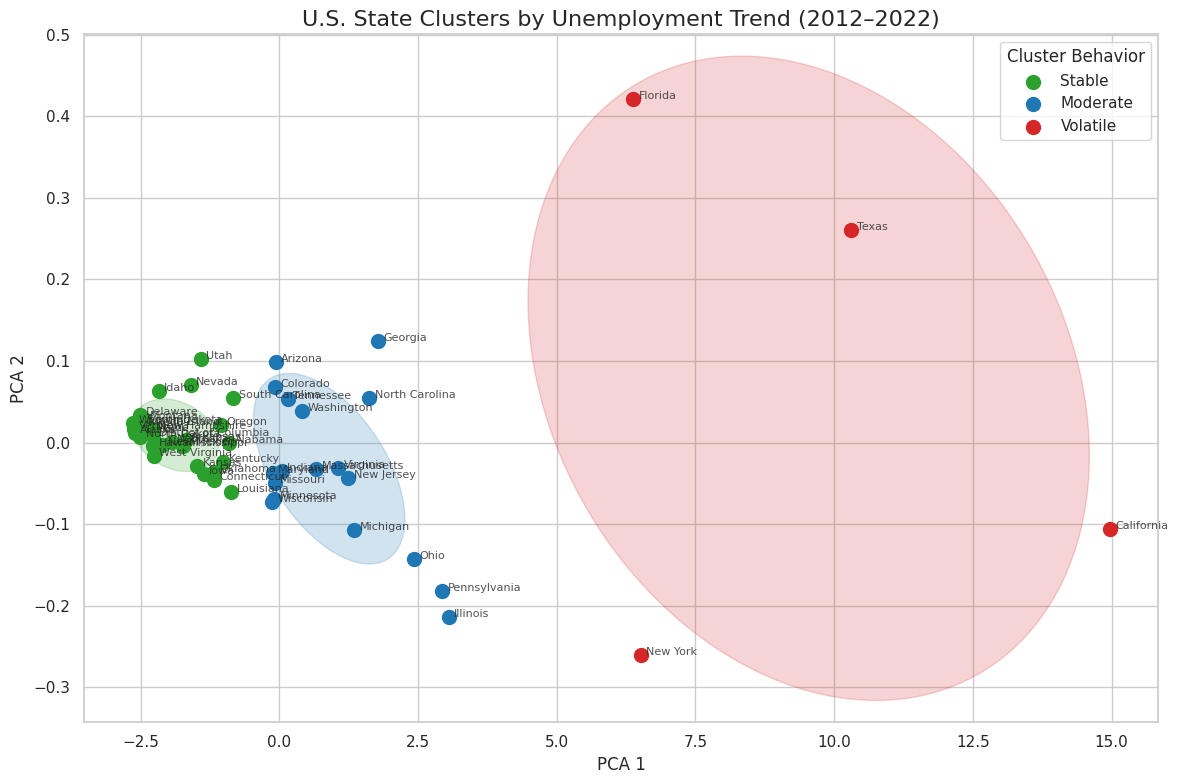

In [83]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse

# Pivot unemployment: State as rows, Year as columns
pivot_df = df.pivot_table(index='State', columns='Year', values='Unemployment')

# Standardize data
scaler = StandardScaler()
scaled = scaler.fit_transform(pivot_df)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled)

# PCA for 2D projection
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

# Prepare plotting DataFrame
plot_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
plot_df['State'] = pivot_df.index
plot_df['Cluster'] = clusters

# Assign cluster labels based on mean PC1 (sorted left to right)
mean_pc1_by_cluster = plot_df.groupby('Cluster')['PC1'].mean().sort_values()
cluster_order = mean_pc1_by_cluster.index.tolist()
cluster_names = {cluster_order[0]: 'Stable', cluster_order[1]: 'Moderate', cluster_order[2]: 'Volatile'}
plot_df['Cluster_Label'] = plot_df['Cluster'].map(cluster_names)

# Define consistent colors for clusters
label_color_map = {
    'Stable': '#2ca02c',    # green
    'Moderate': '#1f77b4',  # blue
    'Volatile': '#d62728'   # red
}

# Plot
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')
for label, color in label_color_map.items():
    group = plot_df[plot_df['Cluster_Label'] == label]
    plt.scatter(group['PC1'], group['PC2'], label=label, s=100, color=color)

    # Add ellipse around each cluster
    if len(group) > 2:
        cov = np.cov(group[['PC1', 'PC2']].T)
        mean = group[['PC1', 'PC2']].mean().values
        eigenvalues, eigenvectors = np.linalg.eigh(cov)
        order = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[order]
        eigenvectors = eigenvectors[:, order]
        angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
        width, height = 2.5 * np.sqrt(eigenvalues)  # scale down ellipse size
        ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle, color=color, alpha=0.2)
        plt.gca().add_patch(ellipse)

# Add state labels
for _, row in plot_df.iterrows():
    plt.text(row['PC1'] + 0.1, row['PC2'], row['State'], fontsize=8, alpha=0.8)

# Formatting
plt.title('U.S. State Clusters by Unemployment Trend (2012–2022)', fontsize=16)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster Behavior')
plt.tight_layout()
plt.grid(True)
plt.show()


### Insights
- Income & Crime:  States with lower per capita income consistently reported higher crime rates, suggesting a socioeconomic vulnerability link.
- Inflation & Expenditure: Regions with higher RPPS and deflator values saw proportionally increased per capita expenditure, highlighting inflation’s tangible impact on household and government spending.
- Unemployment Effects: Higher unemployment levels were associated with both stagnant income growth and elevated crime, reinforcing the broader economic stress factors.
State-level Contrasts:
  - California, New York: High income + high cost of living, but managed crime rates.
  - Alabama, Mississippi: Lower income + higher crime rates + economic strain.
- Pandemic Impact: Post-2020 dips in income and spending trends reflect inflation and COVID-19 disruption.

### Implications
- Targeted Economic Support: States with slower income growth and higher crime (e.g., Alabama, Mississippi) may benefit from focused fiscal policies and federal aid.
- Control Inflation to Boost Real Income: Since real income lags behind nominal gains, stabilizing inflation is essential for preserving purchasing power, especially in vulnerable regions.
- Geographically Tailored Policy: Economic trends vary significantly by region — policymakers should adopt state-specific strategies rather than one-size-fits-all programs.
- Data-Informed Resource Allocation: The combined dataset offers a robust foundation for public agencies to prioritize investments in crime prevention, employment, and welfare.


###Conclusion
 This is just a 1000 feet overview of how economic factors look like, analyze them a bit and do some correlation analysis. This is not a prediction or a model this is a decade long analysis on how the factors look like throughout states in USA, and what are some of the changes we see
